## Import Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
df = pd.read_csv(r"dataset/mimic_perform_train_all_001_data.csv")

df.head()

,Time,PPG,ECG,resp
0,0.000,1.360704,0.455078,1.750153
1,0.008,1.394917,0.404785,1.750153
2,0.016,1.444770,0.339844,1.750153
3,0.024,1.508309,0.300293,1.750153
4,0.032,1.581623,0.285156,1.624924


### Dataset Info

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75001 entries, 0 to 75000
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    75001 non-null  float64
 1   PPG     75001 non-null  float64
 2   ECG     75001 non-null  float64
 3   resp    75001 non-null  float64
dtypes: float64(4)
memory usage: 2.3 MB


### Cut Dataset Into 0-30 Seconds

In [4]:
start_time = 0.000
end_time = 30.000

subset_df = df[(df['Time'] >= start_time) & (df['Time'] <= end_time)]

time = subset_df['Time'].to_numpy()
ppg = subset_df['PPG'].to_numpy()

fs = 1 / (time[1] - time[0])
n = len(ppg)

In [5]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3751 entries, 0 to 3750
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3751 non-null   float64
 1   PPG     3751 non-null   float64
 2   ECG     3751 non-null   float64
 3   resp    3751 non-null   float64
dtypes: float64(4)
memory usage: 146.5 KB


### Fast Fourier Transform (FFT)

In [6]:
def fft_transform(signal, fs, n):
    freqs = np.fft.fftfreq(n, d=1/fs)
    fft_values = np.fft.fft(signal)
    return freqs, np.abs(fft_values)

freqs_ppg, fft_ppg = fft_transform(ppg, fs, n)

### Variable Properties

In [7]:
print(f"Frequency Sampling : {fs}")
print(f"Signal Length : {n}")

Frequency Sampling : 125.0
Signal Length : 3751


### Plot Data

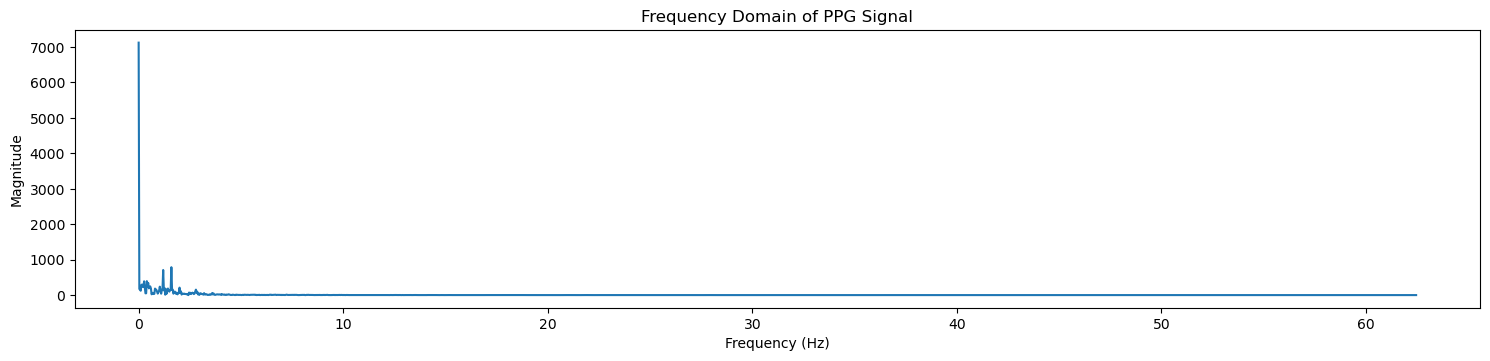

In [11]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(freqs_ppg[:len(freqs_ppg)//2], fft_ppg[:len(fft_ppg)//2]) 
plt.title('Frequency Domain of PPG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

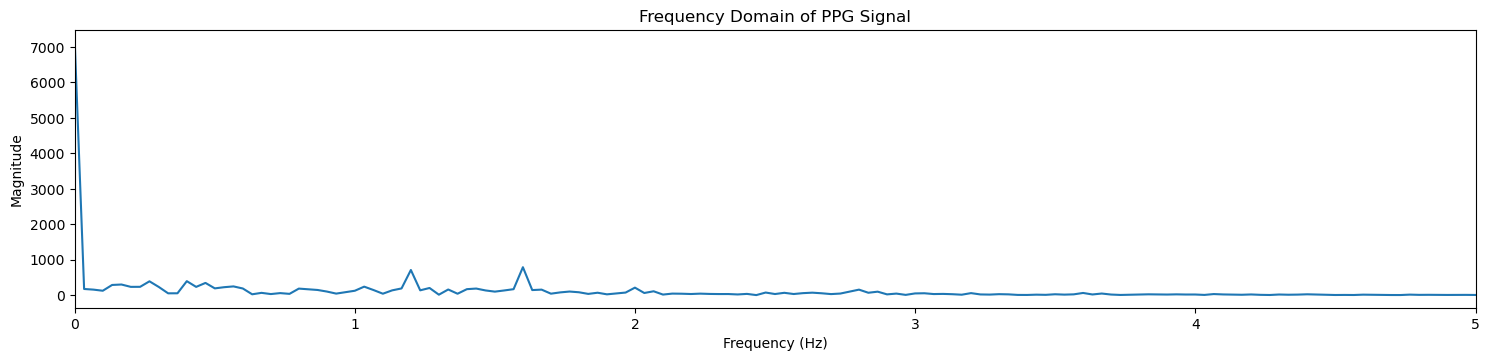

In [9]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(freqs_ppg[:len(freqs_ppg)//2], fft_ppg[:len(fft_ppg)//2])
plt.xlim(0, 5) 
plt.title('Frequency Domain of PPG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()